<a href="https://colab.research.google.com/github/mezaga/ACIML/blob/aciml-06%2F10%2F22/ACIML_seminario_prototype_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACIML Prototipo**

Gerardo Meza, UNAM





---

DESCARGA DE AUDIOS:
https://drive.google.com/file/d/1KW_QrFYsts3ccMv222hJsOLWHKCPdCb_/view?usp=sharing


In [3]:
#@title Carga de Librerias

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jUsI1u3bDkgVyIEuVXaxjEMp_VeEKQvc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jUsI1u3bDkgVyIEuVXaxjEMp_VeEKQvc" -O encoder2.zip && rm -rf /tmp/cookies.txt
!unzip /content/encoder2.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ju7FwlpdeuROeRFjyq34I8UAp6aVwsY6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ju7FwlpdeuROeRFjyq34I8UAp6aVwsY6" -O decoder2.zip && rm -rf /tmp/cookies.txt
!unzip /content/decoder2.zip
from sklearn.preprocessing import StandardScaler
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import IPython
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras import layers
from keras.models import Model
from keras import backend as K
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import IPython
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import random
AUDIO_LOAD = []
etiquetas = []
track_num = []

--2022-10-31 00:12:09--  https://docs.google.com/uc?export=download&confirm=t&id=1jUsI1u3bDkgVyIEuVXaxjEMp_VeEKQvc
Resolving docs.google.com (docs.google.com)... 142.251.12.138, 142.251.12.139, 142.251.12.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.12.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3mceh3hgi8ut25brpmejo4d1oo12920c/1667175075000/00101780325229425041/*/1jUsI1u3bDkgVyIEuVXaxjEMp_VeEKQvc?e=download&uuid=880213d6-de42-417e-b098-5dcdc224ee30 [following]
--2022-10-31 00:12:10--  https://doc-04-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3mceh3hgi8ut25brpmejo4d1oo12920c/1667175075000/00101780325229425041/*/1jUsI1u3bDkgVyIEuVXaxjEMp_VeEKQvc?e=download&uuid=880213d6-de42-417e-b098-5dcdc224ee30
Resolving doc-04-58-docs.googleusercontent.com (doc-04-58-docs.googleusercontent.com)... 142.251.12.132, 

# En la siguente celda puedes subir tus archivos.
1. Escoge el nombre del grupo de audios.
2. Evalúa la celda.
3. Repite hasta tener todos los conjuntos que necesites

In [4]:
#@title Carga de archivos
## 

from google.colab import files
#@ tectInserta
text = 'askfg' #@param {type:"string"}
#AUDIO_LOAD = []
sr16k = 16000
secs = 1
uploaded = files.upload()
#track_num.append(len(uploaded))
for idx, track in enumerate(uploaded.keys()):
  print(track)
  if track.endswith("wav"):
      SR = librosa.get_samplerate(track)
      y, fs = librosa.load(track, SR)
      data = librosa.resample(y[:SR * secs], orig_sr= SR, target_sr= sr16k)
      ##features (tenemos que arreglar el fft apara que sean valores de amp)
      fft = librosa.amplitude_to_db(np.abs(np.fft.fft(data)))
      f0 = np.mean(librosa.yin(data, 30, 2093, sr= sr16k, frame_length= 2048, win_length= 1024))
    #takes only 1 sec and resample to 16k 
      etiquetas.append(text)
      AUDIO_LOAD.append({'gid': text,'id': text+ str(idx), 'trackname': track, 'data': data, 'fft': fft, 'f0': f0})
      

Saving am_048.wav to am_048.wav
Saving am_049.wav to am_049.wav
Saving am_050.wav to am_050.wav
Saving am_051.wav to am_051.wav
Saving am_052.wav to am_052.wav
Saving am_053.wav to am_053.wav
Saving am_054.wav to am_054.wav
Saving am_055.wav to am_055.wav
Saving am_056.wav to am_056.wav
Saving am_057.wav to am_057.wav
Saving am_058.wav to am_058.wav
Saving am_059.wav to am_059.wav
Saving am_060.wav to am_060.wav
Saving am_061.wav to am_061.wav
Saving am_062.wav to am_062.wav
Saving am_063.wav to am_063.wav
Saving am_064.wav to am_064.wav
Saving am_065.wav to am_065.wav
Saving am_066.wav to am_066.wav
Saving am_067.wav to am_067.wav
Saving am_068.wav to am_068.wav
Saving am_069.wav to am_069.wav
Saving am_070.wav to am_070.wav
Saving am_071.wav to am_071.wav
Saving am_072.wav to am_072.wav
Saving am_148.wav to am_148.wav
Saving am_149.wav to am_149.wav
Saving am_150.wav to am_150.wav
Saving am_151.wav to am_151.wav
Saving am_152.wav to am_152.wav
Saving am_153.wav to am_153.wav
Saving a

En la siguiente celda podrás visualizar una tabla con múltiples características que los describen.

In [5]:
#@title DATASET

DATA = pd.DataFrame(AUDIO_LOAD)
#PCA 
data_fft = np.vstack(DATA['fft'])
mu_fft = np.mean(data_fft, axis= 0)
s_fft = np.std(data_fft, axis = 0)+ 0.000001
Xmu_FFT = data_fft- mu_fft/s_fft
DATA

,gid,id,trackname,data,fft,f0
0,askfg,askfg0,am_048.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18.26900091099894, 19.22038968301708, 20.8962...",110.016555
1,askfg,askfg1,am_049.wav,"[-0.012389511, -0.028727518, -0.03683185, -0.0...","[20.66764253561283, 22.609983271317247, 26.443...",55.080368
2,askfg,askfg2,am_050.wav,"[-0.005715537, -0.014489853, -0.01939002, -0.0...","[8.792402140661038, 8.82835498566427, 8.818784...",192.925818
3,askfg,askfg3,am_051.wav,"[0.008070341, 0.012403113, 0.009688513, 0.0097...","[8.176811628069116, 9.71050878099016, 14.67135...",53.380599
4,askfg,askfg4,am_052.wav,"[0.026562514, 0.041438174, 0.03326968, 0.03422...","[-5.384644460666477, -5.999633463704961, -8.71...",59.885349
...,...,...,...,...,...,...
245,askfg,askfg245,am_968.wav,"[-0.0016451358, -0.002850992, -0.0023807301, -...","[-20.911681378602907, -20.911681378602907, -20...",174.468695
246,askfg,askfg246,am_969.wav,"[0.02487838, 0.031954315, 0.015346838, 0.00840...","[-9.061679517763183, -8.917572619267, -9.07497...",440.243670
247,askfg,askfg247,am_970.wav,"[-0.0028901089, -0.005192234, -0.005282825, -0...","[-24.7814302431499, -24.7814302431499, -24.781...",468.219284
248,askfg,askfg248,am_971.wav,"[0.008656576, 0.011849396, 0.0069991536, 0.005...","[-14.435807074106094, -14.435807074106094, -14...",495.455739


In [6]:
#@title Filtrado
zliders = dict(DATA['gid'].value_counts())
color = list(np.random.choice(np.random.randint(0,30),len(zliders),replace = False))
sliders = []
for key in zliders.keys():
  sliders.append(widgets.IntSlider(value = zliders[key], max= zliders[key], step = 1, description= key))

update_sliders = dict(zip([x for x in zliders], sliders))

ui = widgets.VBox(sliders)

def datafilter(**kwargs):
  '''update n number of sliders corresponding to dataclases by splitting dataset uin subgroups and joining them again'''
  dframes = []
  for key, value in kwargs.items():
    dframes.append(DATA[DATA['gid'] == key].reset_index().iloc[0: value])
    #print(key + str(value))
  DATA_filt = pd.concat(dframes).reset_index()
  print(DATA_filt['gid'])
  return DATA_filt


out = widgets.interactive_output(datafilter, update_sliders)
updated_df = datafilter
display(ui,out)

Output()

In [7]:
#@title DATASET
dframes = []
for key, value in update_sliders.items():
  dframes.append(DATA[DATA['gid'] == key].reset_index().iloc[0: value.value])
  #print(key + str(value))
  DATA_filt = pd.concat(dframes).reset_index()
audiotracks = dict(zip(DATA_filt['id'],DATA_filt['id'].index))
DATA_filt

,level_0,index,gid,id,trackname,data,fft,f0
0,0,0,askfg,askfg0,am_048.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18.26900091099894, 19.22038968301708, 20.8962...",110.016555
1,1,1,askfg,askfg1,am_049.wav,"[-0.012389511, -0.028727518, -0.03683185, -0.0...","[20.66764253561283, 22.609983271317247, 26.443...",55.080368
2,2,2,askfg,askfg2,am_050.wav,"[-0.005715537, -0.014489853, -0.01939002, -0.0...","[8.792402140661038, 8.82835498566427, 8.818784...",192.925818
3,3,3,askfg,askfg3,am_051.wav,"[0.008070341, 0.012403113, 0.009688513, 0.0097...","[8.176811628069116, 9.71050878099016, 14.67135...",53.380599
4,4,4,askfg,askfg4,am_052.wav,"[0.026562514, 0.041438174, 0.03326968, 0.03422...","[-5.384644460666477, -5.999633463704961, -8.71...",59.885349
...,...,...,...,...,...,...,...,...
162,162,162,askfg,askfg162,am_660.wav,"[-0.26581538, -0.4571471, -0.43737897, -0.4814...","[-9.212703341636608, -9.914217035555227, -10.4...",129.819321
163,163,163,askfg,askfg163,am_661.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.002687096990673, -10.015144005432914, -11...",272.504657
164,164,164,askfg,askfg164,am_662.wav,"[0.039687987, 0.07112261, 0.07032272, 0.082212...","[-1.1445791075298135, -2.5744035647759795, -6....",86.272915
165,165,165,askfg,askfg165,am_663.wav,"[-0.014068219, -0.026973939, -0.029188627, -0....","[-14.721190094244594, -14.709950320660193, -14...",304.532369


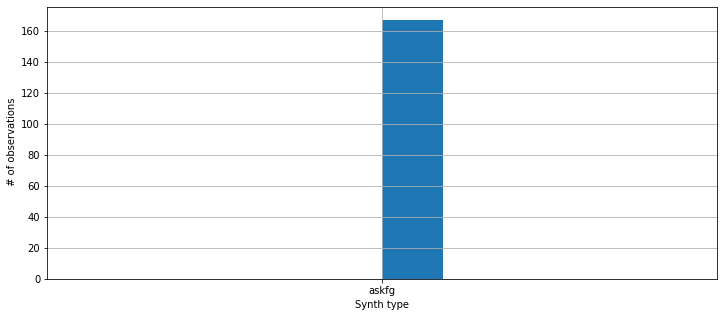

In [10]:
#@title Visualización de datos { run: "auto" }
ids = list(DATA_filt['id'])
audio_viz = 'histogram' #@param ['PCA','F0', 'histogram']
fig, ax = plt.subplots()
fig.set_size_inches([12,5])
if audio_viz == 'histogram':
  ax = DATA_filt['gid'].hist()
  ax.set_xlabel("Synth type")
  ax.set_ylabel(" # of observations")
  plt.show()
if audio_viz == 'F0':
  ax.plot(DATA_filt.index, DATA_filt['f0'], linestyle = '--')
  ax.set_xlabel("Audios")
  ax.set_ylabel(" F0")
  plt.show()
if audio_viz == 'PCA':
  pca = PCA(n_components= 2)
  X_PCA = pca.fit_transform(Xmu_FFT)
  print('variance: ')
  print(pca.explained_variance_ratio_)
  counter = 0 
  cu = 0
  for key, value in zliders.items():
    #print(key,value)
    ax.scatter(X_PCA[counter: counter + value, 0], X_PCA[counter: counter + value, 1], cmap= 10, label = key)
    counter += value
    cu += 1
  #for idx, id in enumerate(ids):
  #  ax.annotate(id,(X_PCA[idx][0], X_PCA[idx][1]+ 0.2))
  fig.add_axes(ax)
  plt.legend()
  plt.title('PCA')
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.show()
  


In [22]:
#@title Entrenamiento del modelo

from google.colab import files
##standarizacion de datos
data = np.vstack(DATA_filt['data'])
mu_wave = np.mean(data, axis= 1)[...,np.newaxis]
max_wave = np.max(data, axis=1)[...,np.newaxis]
Xw = (data- mu_wave)/max_wave
Xw = Xw[...,np.newaxis][...,np.newaxis]

#referencia_1 = 'Nuevo modelo' #@param ['Nuevo modelo','Preentrenado','mi modelo']
#Epocas = 10 #@param {type:"slider", min:10, max:10000, step:1}
#batches = 20 #@param {type: "integer"}
#lr = 0.00008 #@param {type: "slider", min:0.00001, max: 0.0001, step:0.00001}

warm_up_iters = 1000 
optimizer = tf.keras.optimizers.Adam(lr, clipvalue=0.5)
if referencia_1 == 'Preentrenado': 
  original_dim = (16000, 1, 1)
  encoder_inputs = keras.Input(original_dim)  
  encoder_pretrained = tf.keras.models.load_model('/content/encoder2',compile = False)
  decoder_pretrained = tf.keras.models.load_model('/content/decoder2',compile = False)
  outpt = decoder_pretrained(encoder_pretrained(encoder_inputs)[2])
  vae = Model(inputs=encoder_inputs, outputs=outpt, name='VAE-Model')
  vae.compile(optimizer= optimizer,loss = 'mean_squared_error')
  tr_logs = vae.fit(Xw, Xw, shuffle = True, batch_size= batches, epochs= Epocas, verbose = 1)
  latent =  encoder_pretrained.predict(Xw[0:])

if referencia_1 == 'Nuevo modelo': 
  new_model = tf.keras.models.load_model('/content/model_vae')
  new_model.compile(optimizer= optimizer,loss = 'mean_squared_error')
  tr_logs = new_model.fit(Xw, Xw, shuffle = True, batch_size= batches, epochs= Epocas, verbose = 1)
else:
  print('.....')
  '''
  new_model = tf.keras.models.load_model('/content/model_vae')
  new_model.compile(optimizer= optimizer,loss = 'mean_squared_error')
  tr_logs = new_model.fit(Xw, Xw, shuffle = True, batch_size= batches, epochs= Epocas, verbose = 1)
  '''


OSError: ignored

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


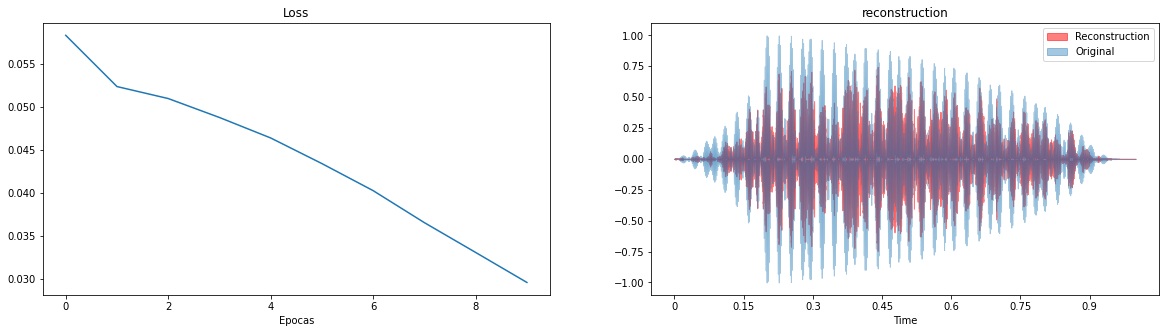

In [12]:
#@title Evaluación del modelo
#una visualización donde se vea la curva del modelo junto a la recunstruccion

def latent_vectorize(audio_id,df,audio_list):
  audio_idx = list(df[df['id'] == audio_id].index)[0]
  latent_gen = encoder_pretrained.predict(audio_list[audio_idx:])
  return latent_gen[0]

def latent_reconstruction(latent_gen):
  recons = decoder_pretrained.predict(latent_gen[0:])
  recons= recons[0].flatten()
  return recons


def latent_search(audio_id, df, audio_list):
  '''function that retrieves the correct audio representation in the latent space'''
  try:
    latent_gen = latent_vectorize(audio_id,df,audio_list)
    recons = latent_reconstruction(latent_gen)
    return latent_gen, recons
  except TypeError:
    print("audio input must be a valid string")
    
def latent_inter(audio_a, audio_b, step = 100, porcentaje = 50, audio_list = Xw):
  'crea 100 vectores pensados en % y reconstruye'
  if step == 1:
    listas = np.linspace(audio_a, audio_b, step)
    res = latent_reconstruction(listas[porcentaje-1:])
  else:
    listas = np.linspace(audio_a, audio_b, step)
    res = latent_reconstruction(listas[porcentaje-1:])
  return res

'''
def latent_search(audio_id, df, audio_list):
 ''''''function that retrieves the correct audio representation in the latent space''''''
  try:
    audio_idx = list(df[df['id'] == audio_id].index)[0]
    latent_gen = encoder_pretrained.predict(audio_list[audio_idx:])
    recons = decoder_pretrained.predict(latent_gen[0][0:])
    recons= recons[0].flatten()
    return latent_gen, recons
  except TypeError:
    print("audio input must be a valid string")
'''

def gps_latent(dic_tracks, df, data):
  '''search all track ids position in the latent space in an ''orderly fashion'' '''
  res_latent = []
  for key in dic_tracks.keys():
    res_latent.append(latent_search(key, df, data)[0])
  return res_latent

all_tracks_latent = gps_latent(audiotracks, DATA_filt, Xw)



track = random.choices(ids)[0]
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(5)
ax[0].plot(tr_logs.history['loss'])
librosa.display.waveshow(latent_search(track, DATA_filt, Xw)[1], sr=16000, color='r', alpha=0.5, ax=ax[1], label='Reconstruction')
librosa.display.waveshow(Xw[audiotracks[track]].flatten(), sr=16000, alpha=0.4, ax=ax[1], label='Original')
ax[1].legend()
ax[0].set_xlabel("Epocas")
ax[0].set_title('Loss')
ax[1].set_title('reconstruction')


####archivos de audio
IPython.display.display(IPython.display.Audio(Xw[audiotracks[track]].flatten(), rate = sr16k))
IPython.display.display(IPython.display.Audio(latent_search(track, DATA_filt, Xw)[1],rate = sr16k))

1/1 [==============================] - 0s 35ms/step


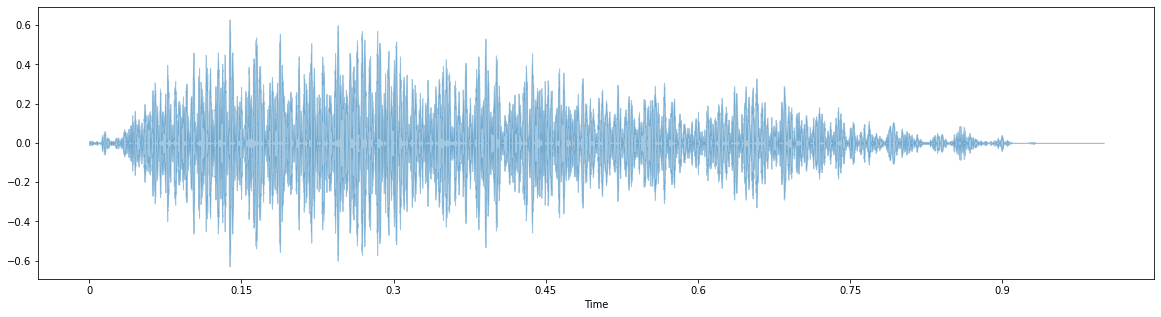

In [21]:
#@title Interpolación { run: "auto" }
audio = 'askfg0' #@param {type:"string"}
audio2 = 'askfg165' #@param {type:"string"}

porcentaje_de_cambio = 1 #@param {type:"slider", min:1, max:10, step:1}
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(5)

idx = list(DATA_filt[DATA_filt['id'] == audio].index)[0]
idx2 = list(DATA_filt[DATA_filt['id'] == audio2].index)[0]
audio_a = all_tracks_latent[0][idx]
audio_b = all_tracks_latent[0][idx2]
inter = latent_inter(audio_a, audio_b, 10, porcentaje_de_cambio)

#a_1 = latent_search(audio)[0]
#a_2 = latent_search(audio)[0]

#inter = latent_inter(a_1,a_2, 100, porcentaje_de_cambio)
#ax.plot(inter)
librosa.display.waveshow(inter, sr=16000, alpha=0.4, label='Original')
IPython.display.display(IPython.display.Audio(inter, rate = sr16k))



******
*
*
*
*
*
*
*
*
*
*
*
*




******

******
*
*
*
*
*
*
*
*
*
*
*
*




******

******
*
*
*
*
*
*
*
*
*
*
*
*




******

In [ ]:
#@title Descarga de materiales
!zip -r /content/model_vae.zip /content/model_vae

modelo = True #@param {type:"boolean"}
espacio_latente = True #@param {type:"boolean"}
boolean_checkbox = True #@param {type:"boolean"}

if modelo == True:
  files.download('/content/model_vae.zip')

'am_4.wav'